# Project 2: Baseball
Thomas Burr

May 2016

## Overview



In [126]:
#Import main packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math
%pylab inline


Populating the interactive namespace from numpy and matplotlib


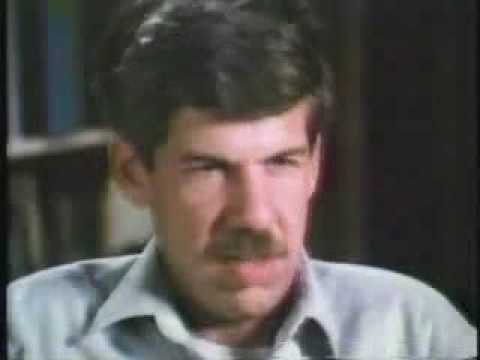

In [102]:
from IPython.display import YouTubeVideo
YouTubeVideo("2ZBh2ZbEo0I")

In [103]:
#Import necessary data
batting = pd.read_csv("https://raw.githubusercontent.com/thomasburr/Udacity-Project-2-Baseball/master/data/Batting.csv")

In [104]:
batting.head()
#Batting file is at the player-year level

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [105]:
#Key stats like IBB, HBP are currently NaN...when is the earliest they appear?
yearly_batting = batting.groupby('yearID')


In [106]:
batting.columns
#We have most of the types we would need...excpet for ABs...

Index([u'playerID', u'yearID', u'stint', u'teamID', u'lgID', u'G', u'AB', u'R',
       u'H', u'2B', u'3B', u'HR', u'RBI', u'SB', u'CS', u'BB', u'SO', u'IBB',
       u'HBP', u'SH', u'SF', u'GIDP'],
      dtype='object')

In [107]:
#Need to rename some columns to remove things like '2B'

batting = batting.rename(columns = {'2B': "double",'3B':"triple"})

In [108]:
batting = batting.query("lgID == 'AL' or lgID == 'NL'")
batting = batting.fillna(value=0)
batting.columns

Index([u'playerID', u'yearID', u'stint', u'teamID', u'lgID', u'G', u'AB', u'R',
       u'H', u'double', u'triple', u'HR', u'RBI', u'SB', u'CS', u'BB', u'SO',
       u'IBB', u'HBP', u'SH', u'SF', u'GIDP'],
      dtype='object')

In [116]:
#Plate Appearances = ABs + Walks + HBP + Sacrifice Flies + Sacrifice Hits
batting = batting.assign(PA = batting.AB + batting.BB + batting.HBP + batting.SF + batting.SH)

#On Base Percentage = (H + BB + HBP)/ (AB + BB + HBP + SF)
batting = batting.assign(OBP = (batting.H + batting.BB +batting.HBP)/(batting.AB + batting.BB + batting.HBP + batting.SF))

#Need Singles
batting = batting.assign(single = batting.H - batting.double - batting.triple - batting.HR)

#Slugging

batting = batting.assign(SLG = (batting.single + 2 * batting.double + 3 * batting.triple + 4 * batting.HR)/batting.AB)

#OPS

batting = batting.assign(OPS = batting.SLG + batting.OBP)

#Getting NaNs for the early years since SH, SF, IBP, HBP not defined...how early does that go?

In [119]:
#yearly_batting = batting.groupby('yearID')

#def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
    
#print_full( yearly_batting['OPS'].mean())

IndentationError: unexpected indent (<ipython-input-119-c8083e7e3a2b>, line 4)

In [120]:
qualified_batters = batting.query('AB > 500')

In [121]:
qualified_batters.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,double,...,IBB,HBP,SH,SF,GIDP,PA,OBP,single,SLG,OPS
2141,dalryab01,1884,1,CHN,NL,111,521.0,111.0,161.0,18.0,...,0.0,0.0,0.0,0.0,0.0,535.0,0.327103,112.0,0.504798,0.831901
2316,hornujo01,1884,1,BSN,NL,115,518.0,119.0,139.0,27.0,...,0.0,0.0,0.0,0.0,0.0,535.0,0.291589,95.0,0.399614,0.691203
3103,ansonca01,1886,1,CHN,NL,125,504.0,117.0,187.0,35.0,...,0.0,0.0,0.0,0.0,0.0,559.0,0.432916,131.0,0.543651,0.976567
3377,richaha01,1886,1,DTN,NL,125,538.0,125.0,189.0,27.0,...,0.0,0.0,0.0,0.0,0.0,584.0,0.402397,140.0,0.503717,0.906115
3425,thompsa01,1886,1,DTN,NL,122,503.0,101.0,156.0,18.0,...,0.0,0.0,0.0,0.0,0.0,538.0,0.355019,117.0,0.445328,0.800347


In [132]:
yearly_batting_qualified = qualified_batters.groupby('yearID')

print_full( yearly_batting_qualified['OPS'].mean())



yearID
1884    0.761552
1886    0.894343
1887    0.812514
1888    0.676281
1889    0.748762
1890    0.737472
1891    0.720361
1892    0.688564
1893    0.789306
1894    0.858482
1895    0.830703
1896    0.820120
1897    0.833014
1898    0.715698
1899    0.762562
1900    0.773191
1901    0.764556
1902    0.735902
1903    0.733776
1904    0.674460
1905    0.686967
1906    0.684961
1907    0.669353
1908    0.672229
1909    0.699640
1910    0.722657
1911    0.757949
1912    0.766794
1913    0.737684
1914    0.709814
1915    0.706412
1916    0.709802
1917    0.717574
1918    0.708376
1919    0.744514
1920    0.772770
1921    0.816936
1922    0.801889
1923    0.813553
1924    0.801503
1925    0.845328
1926    0.796256
1927    0.814736
1928    0.808032
1929    0.861276
1930    0.888615
1931    0.818237
1932    0.818284
1933    0.764633
1934    0.825959
1935    0.806893
1936    0.828897
1937    0.824465
1938    0.821303
1939    0.809442
1940    0.806748
1941    0.787265
1942    0.751296
1943   

In [164]:
yearly_batting = batting.groupby('yearID')
yearly_agg = (yearly_batting.agg({"yearID": "count",
                                  "AB" : "sum",
                                  "H" : 'sum',
                                  "BB": 'sum',
                                  "HBP": 'sum',
                                  "SF": 'sum',
                                  'SH': 'sum',
                                  'single':'sum',
                                  'double': 'sum',
                                  'triple': 'sum',
                                  'HR': 'sum'}))

In [165]:
yearly_agg['BA'] = yearly_agg['H'] / yearly_agg['AB']

In [159]:
print_full(yearly_agg)

              AB       BB        H      SF  yearID      SH     HBP       OBP  \
yearID                                                                         
1876     20121.0    336.0   5338.0     0.0     124     0.0     0.0  0.277362   
1877     13667.0    345.0   3705.0     0.0      97     0.0     0.0  0.289038   
1878     13644.0    364.0   3539.0     0.0      80     0.0     0.0  0.278626   
1879     24155.0    508.0   6171.0     0.0     127     0.0     0.0  0.270811   
1880     24301.0    740.0   5946.0     0.0     135     0.0     0.0  0.267002   
1881     24377.0   1033.0   6339.0     0.0     132     0.0     0.0  0.290122   
1882     24769.0    960.0   6225.0     0.0     126     0.0     0.0  0.279257   
1883     29012.0   1121.0   7611.0     0.0     133     0.0     0.0  0.289782   
1884     32687.0   1821.0   8071.0     0.0     167     0.0     0.0  0.286658   
1885     31123.0   1845.0   7516.0     0.0     181     0.0     0.0  0.283942   
1886     33997.0   2372.0   8524.0     0

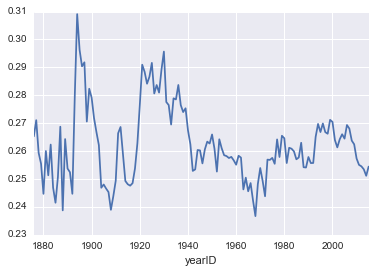

In [166]:
yearly_agg['BA'].plot()


In [167]:
#On Base Percentage = (H + BB + HBP)/ (AB + BB + HBP + SF)
yearly_agg = yearly_agg.assign(OBP = (yearly_agg.H + yearly_agg.BB + yearly_agg.HBP)/(yearly_agg.AB + yearly_agg.BB + yearly_agg.HBP + yearly_agg.SF))


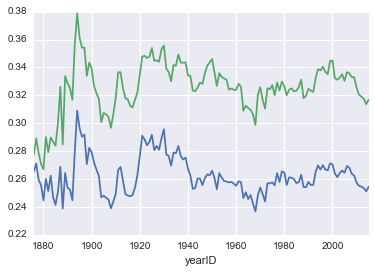

In [168]:
yearly_agg['BA'].plot()
yearly_agg['OBP'].plot()

In [169]:
yearly_agg['obp_spread'] = yearly_agg['OBP'] - yearly_agg['BA']

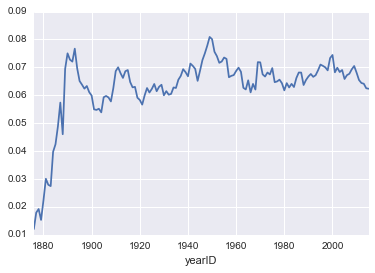

In [170]:
yearly_agg['obp_spread'].plot()

In [171]:
yearly_agg = yearly_agg.assign(SLG = (yearly_agg.single + 2 * yearly_agg.double + 3 * yearly_agg.triple + 4 * yearly_agg.HR)/yearly_agg.AB)


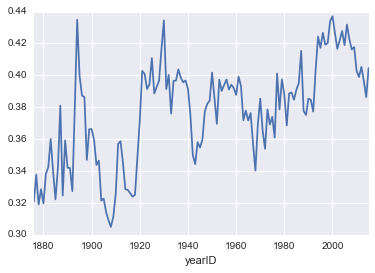

In [172]:
yearly_agg['SLG'].plot()